In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

shooting_df = pd.read_csv("../../../data/Shootings.csv")
shooting_df

,incident_num,shooting_date,district,shooting_type_v2,victim_gender,victim_race,victim_ethnicity_NIBRS,multi_victim
0,I152000196-00,2015-01-01 13:30:00+00,C11,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
1,I152000879-00,2015-01-04 01:58:00+00,E18,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
2,I152001014-00,2015-01-04 18:52:00+00,E5,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
3,I152002232-00,2015-01-08 22:45:00+00,B2,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t
4,I152002233-00,2015-01-08 22:45:00+00,B2,Non-Fatal,Female,Black or African American,Not Hispanic or Latinx,t
...,...,...,...,...,...,...,...,...
1791,232011907,2023-02-13 20:08:00+00,B2,Fatal,Male,Black or African American,Not Hispanic or Latinx,t
1792,232011907,2023-02-13 20:08:00+00,B2,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t
1793,232012721,2023-02-16 18:13:00+00,B2,Non-Fatal,Male,White,Hispanic or Latinx,f
1794,232013356,2023-02-18 21:43:00+00,B3,Fatal,Female,Black or African American,Unknown,f


The dataframe above is a csv file posted on the boston.gov website that shows information on shootings within the city of Boston that fall under Boston Police Department jurisdiction. This dataframe contains information from 2015 and on with a 7 day rolling delay.

In [3]:
df1 = shooting_df.copy()
dist4 = '|'.join(['B2','B3','C11','E13'])
other = '|'.join(['A15','A1','A7','C6','D4','D14','E5','E18'])
df1['district'] = df1['district'].str.replace(dist4, 'District 4')
df1['district'] = df1['district'].str.replace(other, 'Not District 4')

df1

,incident_num,shooting_date,district,shooting_type_v2,victim_gender,victim_race,victim_ethnicity_NIBRS,multi_victim
0,I152000196-00,2015-01-01 13:30:00+00,District 4,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
1,I152000879-00,2015-01-04 01:58:00+00,Not District 4,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
2,I152001014-00,2015-01-04 18:52:00+00,Not District 4,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,f
3,I152002232-00,2015-01-08 22:45:00+00,District 4,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t
4,I152002233-00,2015-01-08 22:45:00+00,District 4,Non-Fatal,Female,Black or African American,Not Hispanic or Latinx,t
...,...,...,...,...,...,...,...,...
1791,232011907,2023-02-13 20:08:00+00,District 4,Fatal,Male,Black or African American,Not Hispanic or Latinx,t
1792,232011907,2023-02-13 20:08:00+00,District 4,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t
1793,232012721,2023-02-16 18:13:00+00,District 4,Non-Fatal,Male,White,Hispanic or Latinx,f
1794,232013356,2023-02-18 21:43:00+00,District 4,Fatal,Female,Black or African American,Unknown,f


Because we are looking specifically at the shootings in District 4 vs. all other districts, I decided to make it easier on myself and change the district column to either 'District 4' or 'Not District 4' depending upon where the incident occurred. This way we can easily compare the probability of shootings that occurred within District 4 vs. outside District 4.

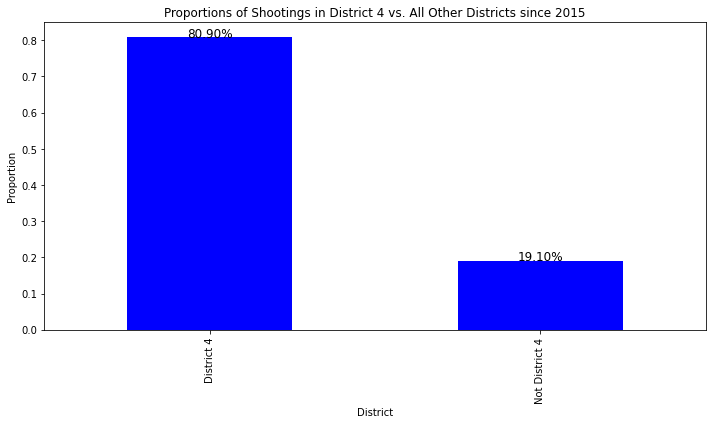

In [4]:
# probabilities_sh = df1['district'].value_counts(normalize=True)
# print('Percentage of Shootings in District 4: %.2f' %(probabilities_sh[0]*100)+'%')
# print('Percentage of Shootings in All Other Districts: %.2f' % (probabilities_sh[1]*100)+'%')
# print('Total Percentage: %.2f' % ((probabilities_sh[0] + probabilities_sh[1])*100)+'%')

# probabilities_sh.plot(kind='bar', figsize=(10,5), color='blue', title='Proportions of Shootings in District 4 vs. All Other Districts since 2015')

probabilities_sh = df1['district'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(10,6))
probabilities_sh.plot(kind='bar', ax=ax, color='blue')
ax.set_title('Proportions of Shootings in District 4 vs. All Other Districts since 2015')
ax.set_xlabel('District')
ax.set_ylabel('Proportion')

ax.annotate('%.2f%%' % (probabilities_sh[0]*100), xy=(0, probabilities_sh[0]), ha='center', fontsize=12)
ax.annotate('%.2f%%' % (probabilities_sh[1]*100), xy=(1, probabilities_sh[1]), ha='center', fontsize=12)

plt.tight_layout()

# Change the file path and name to your desired location and file name
plt.savefig('proportions_of_shootings.png')

Above is a bar graph that shows the information on shootings that have occurred within District 4 vs. outside District 4 since 2015. As we can see, about 80% of all shootings occur within District 4.

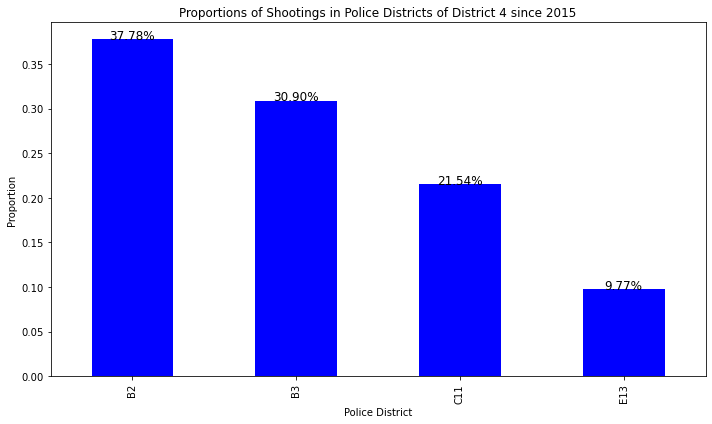

In [5]:
# sd4_df = shooting_df.copy()
# sd4_df['district'] = sd4_df['district'].str.replace(other, 'Not District 4')
# sd4_df.drop(sd4_df[sd4_df['district'] == 'Not District 4'].index, inplace=True)
# probabilities_sd4 = sd4_df['district'].value_counts(normalize=True)
# print('Percentage of Shootings in B2: %.2f' % (probabilities_sd4[0]*100)+'%')
# print('Percentage of Shootings in B3: %.2f' % (probabilities_sd4[1]*100)+'%')
# print('Percentage of Shootings in C11: %.2f' % (probabilities_sd4[2]*100)+'%')
# print('Percentage of Shootings in E13: %.2f' % (probabilities_sd4[3]*100)+'%')
# print('Total Percentage: %.2f' % ((probabilities_sd4[0] + probabilities_sd4[1] + probabilities_sd4[2] + probabilities_sd4[3])*100)+'%')

# probabilities_sd4.plot(kind='bar', figsize=(10,5), color='blue', title='Proportions of Shootings in Police Districts of District 4 since 2015')

sd4_df = shooting_df.copy()
sd4_df['district'] = sd4_df['district'].str.replace(other, 'Not District 4')
sd4_df.drop(sd4_df[sd4_df['district'] == 'Not District 4'].index, inplace=True)
probabilities_sd4 = sd4_df['district'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(10,6))
probabilities_sd4.plot(kind='bar', ax=ax, color='blue')
ax.set_title('Proportions of Shootings in Police Districts of District 4 since 2015')
ax.set_xlabel('Police District')
ax.set_ylabel('Proportion')

for i, v in enumerate(probabilities_sd4):
    ax.annotate('%.2f%%' % (v*100), xy=(i, v), ha='center', fontsize=12)

plt.tight_layout()

plt.savefig('proportions_of_shootings_district4.png')

Above is a graph which shows the proportion of shootings that have occurred at each police district within District 4 since 2015. The police district with the most shootings is B2, which is found in Roxbury, Massachusetts. (B3: Mattapan/Dorchester, C11: Another part of Dorchester, E13: Jamaica Plain)

In [6]:
shotsfired_df = pd.read_csv("../../../data/ShotsFired.csv")

shotsfired_df

,incident_num,incident_date,district,ballistics_evidence
0,I152000093-00,2015-01-01 04:17:00+00,C11,f
1,I152000042-00,2015-01-01 00:05:00+00,A15,f
2,I152000514-00,2015-01-02 15:51:00+00,B3,t
3,I152000965-00,2015-01-04 15:30:00+00,B2,t
4,I152000872-00,2015-01-04 00:13:00+00,B2,f
...,...,...,...,...
7548,232012811,2023-02-17 02:49:00+00,B3,f
7549,232013391,2023-02-19 02:30:00+00,B2,t
7550,232013333,2023-02-18 19:57:00+00,B2,t
7551,232013221,2023-02-18 11:39:00+00,E5,f


The dataframe above is a csv file posted on the boston.gov website that shows information on shots fired within the city of Boston that fall under Boston Police Department jurisdiction. This dataframe contains information from 2015 and on with a 7 day rolling delay.

In [7]:
df2 = shotsfired_df.copy()
print(df2['district'].unique())
df2['district'] = df2['district'].str.replace(dist4, 'District 4')
df2['district'] = df2['district'].str.replace(other, 'Not District 4')
print(df2['district'].unique())
df2.dropna(subset=['district'],inplace=True)
print(df2['district'].unique())

df2

['C11' 'A15' 'B3' 'B2' 'E13' 'C6' 'A1' 'A7' 'E18' 'D4' 'E5' nan 'D14']
['District 4' 'Not District 4' nan]
['District 4' 'Not District 4']


,incident_num,incident_date,district,ballistics_evidence
0,I152000093-00,2015-01-01 04:17:00+00,District 4,f
1,I152000042-00,2015-01-01 00:05:00+00,Not District 4,f
2,I152000514-00,2015-01-02 15:51:00+00,District 4,t
3,I152000965-00,2015-01-04 15:30:00+00,District 4,t
4,I152000872-00,2015-01-04 00:13:00+00,District 4,f
...,...,...,...,...
7548,232012811,2023-02-17 02:49:00+00,District 4,f
7549,232013391,2023-02-19 02:30:00+00,District 4,t
7550,232013333,2023-02-18 19:57:00+00,District 4,t
7551,232013221,2023-02-18 11:39:00+00,Not District 4,f


Above we do the same thing that we did for the last dataframe, we turn all the different police districts into either 'District 4' or 'Not District 4' and also eliminate any NaN values that may disrupt the data.


Percentage of Shots Fired in District 4 since 2015: 81.55%
Percentage of Shots Fired in All Other Districts since 2015: 18.45%
Total Percentage: 100.00%


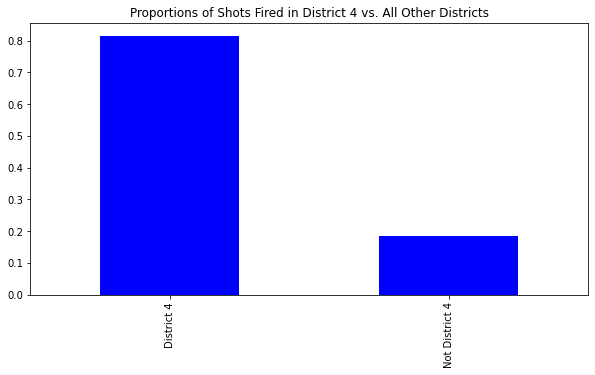

In [8]:
probabilities_sf = df2['district'].value_counts(normalize=True)
print('Percentage of Shots Fired in District 4 since 2015: %.2f' % (probabilities_sf[0]*100)+'%')
print('Percentage of Shots Fired in All Other Districts since 2015: %.2f' % (probabilities_sf[1]*100)+'%')
print('Total Percentage: %.2f' % ((probabilities_sf[0] + probabilities_sf[1])*100)+'%')

probabilities_sf.plot(kind='bar', figsize=(10,5), color='blue', title='Proportions of Shots Fired in District 4 vs. All Other Districts')

The graph above shows the percentage of shots fired within District 4 vs. all the other districts since 2015. About 82% of shots fired are within District 4.

Percentage of Shots Fired in B2: 35.39%
Percentage of Shots Fired in B3: 31.96%
Percentage of Shots Fired in C11: 25.45%
Percentage of Shots Fired in E13: 7.20%
Total Percentage: 100.00%


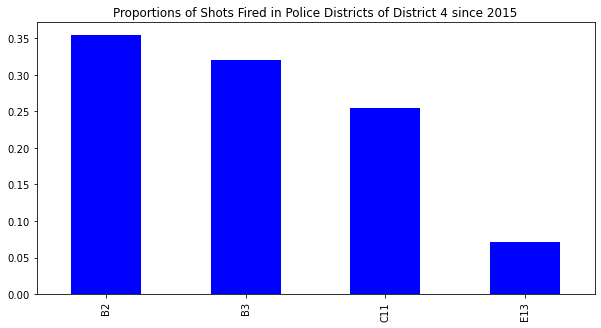

In [9]:
sfd4_df = shotsfired_df.copy()
sfd4_df['district'] = sfd4_df['district'].str.replace(other, 'Not District 4')
sfd4_df.drop(sfd4_df[sfd4_df['district'] == 'Not District 4'].index, inplace=True)
probabilities_sfd4 = sfd4_df['district'].value_counts(normalize=True)
print('Percentage of Shots Fired in B2: %.2f' % (probabilities_sfd4[0]*100)+'%')
print('Percentage of Shots Fired in B3: %.2f' % (probabilities_sfd4[1]*100)+'%')
print('Percentage of Shots Fired in C11: %.2f' % (probabilities_sfd4[2]*100)+'%')
print('Percentage of Shots Fired in E13: %.2f' % (probabilities_sfd4[3]*100)+'%')
print('Total Percentage: %.2f' % ((probabilities_sfd4[0] + probabilities_sfd4[1] + probabilities_sfd4[2] + probabilities_sfd4[3])*100)+'%')

probabilities_sfd4.plot(kind='bar', figsize=(10,5), color='blue', title='Proportions of Shots Fired in Police Districts of District 4 since 2015')

Above is a graph which shows the proportion of shots fired that have occurred at each police district within District 4 since 2015. The police district with the most shots fired is B2, which is found in Roxbury, Massachusetts. (B3: Mattapan/Dorchester, C11: Another part of Dorchester, E13: Jamaica Plain)

In [10]:
from datetime import datetime

sd4_df["shooting_date"] = pd.to_datetime(sd4_df["shooting_date"])

yearly_shootings = sd4_df.groupby(sd4_df["shooting_date"].dt.year)

shootings_2015 = yearly_shootings.get_group(2015)
shootings_2016 = yearly_shootings.get_group(2016)
shootings_2017 = yearly_shootings.get_group(2017)
shootings_2018 = yearly_shootings.get_group(2018)
shootings_2019 = yearly_shootings.get_group(2019)
shootings_2020 = yearly_shootings.get_group(2020)
shootings_2021 = yearly_shootings.get_group(2021)
shootings_2022 = yearly_shootings.get_group(2022)
shootings_2023 = yearly_shootings.get_group(2023)


<ipython-input-11-3a6a3c7c854d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2015['shooting_date'] = pd.to_datetime(shootings_2015['shooting_date'])
<ipython-input-11-3a6a3c7c854d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2015['day_of_week'] = shootings_2015['shooting_date'].dt.day_name()
<ipython-input-11-3a6a3c7c854d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

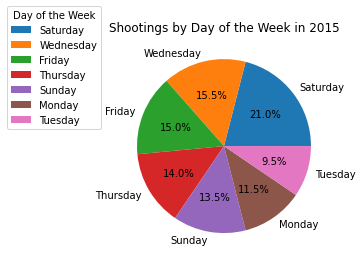

In [11]:
shootings_2015['shooting_date'] = pd.to_datetime(shootings_2015['shooting_date'])

shootings_2015['day_of_week'] = shootings_2015['shooting_date'].dt.day_name()
shootings_2015['time_of_day'] = shootings_2015['shooting_date'].dt.strftime('%H:%M')

day_counts = shootings_2015['day_of_week'].value_counts()

piechart = plt.pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%')
plt.title('Shootings by Day of the Week in 2015')
plt.legend(title="Day of the Week", loc="center left", bbox_to_anchor=(-.52, 0, 0.5, 1.72))
plt.savefig('DaysoftheWeek/Race piechart for 2015')

<ipython-input-12-371d79b37ac0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2016['shooting_date'] = pd.to_datetime(shootings_2016['shooting_date'])
<ipython-input-12-371d79b37ac0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2016['day_of_week'] = shootings_2016['shooting_date'].dt.day_name()
<ipython-input-12-371d79b37ac0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

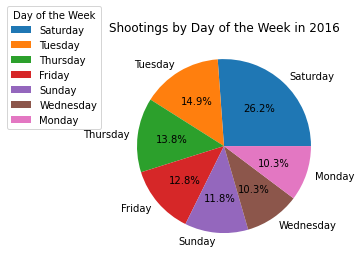

In [12]:
shootings_2016['shooting_date'] = pd.to_datetime(shootings_2016['shooting_date'])

shootings_2016['day_of_week'] = shootings_2016['shooting_date'].dt.day_name()
shootings_2016['time_of_day'] = shootings_2016['shooting_date'].dt.strftime('%H:%M')

day_counts = shootings_2016['day_of_week'].value_counts()

piechart = plt.pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%')
plt.title('Shootings by Day of the Week in 2016')
plt.legend(title="Day of the Week", loc="center left", bbox_to_anchor=(-.52, 0, 0.5, 1.72))
plt.savefig('DaysoftheWeek/Race piechart for 2016')

<ipython-input-13-4def3d1274a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2017['shooting_date'] = pd.to_datetime(shootings_2017['shooting_date'])
<ipython-input-13-4def3d1274a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2017['day_of_week'] = shootings_2017['shooting_date'].dt.day_name()
<ipython-input-13-4def3d1274a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

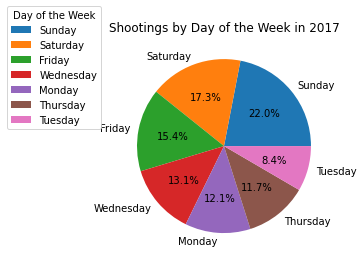

In [13]:
shootings_2017['shooting_date'] = pd.to_datetime(shootings_2017['shooting_date'])

shootings_2017['day_of_week'] = shootings_2017['shooting_date'].dt.day_name()
shootings_2017['time_of_day'] = shootings_2017['shooting_date'].dt.strftime('%H:%M')

day_counts = shootings_2017['day_of_week'].value_counts()

piechart = plt.pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%')
plt.title('Shootings by Day of the Week in 2017')
plt.legend(title="Day of the Week", loc="center left", bbox_to_anchor=(-.52, 0, 0.5, 1.72))
plt.savefig('DaysoftheWeek/Race piechart for 2017')

<ipython-input-14-76dbc7ea54f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2018['shooting_date'] = pd.to_datetime(shootings_2018['shooting_date'])
<ipython-input-14-76dbc7ea54f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2018['day_of_week'] = shootings_2018['shooting_date'].dt.day_name()
<ipython-input-14-76dbc7ea54f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

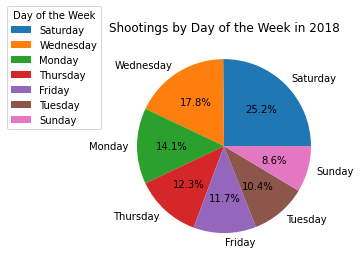

In [14]:
shootings_2018['shooting_date'] = pd.to_datetime(shootings_2018['shooting_date'])

shootings_2018['day_of_week'] = shootings_2018['shooting_date'].dt.day_name()
shootings_2018['time_of_day'] = shootings_2018['shooting_date'].dt.strftime('%H:%M')

day_counts = shootings_2018['day_of_week'].value_counts()

piechart = plt.pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%')
plt.title('Shootings by Day of the Week in 2018')
plt.legend(title="Day of the Week", loc="center left", bbox_to_anchor=(-.52, 0, 0.5, 1.72))
plt.savefig('DaysoftheWeek/Race piechart for 2018')

<ipython-input-15-e121c8b999c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2019['shooting_date'] = pd.to_datetime(shootings_2019['shooting_date'])
<ipython-input-15-e121c8b999c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2019['day_of_week'] = shootings_2019['shooting_date'].dt.day_name()
<ipython-input-15-e121c8b999c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

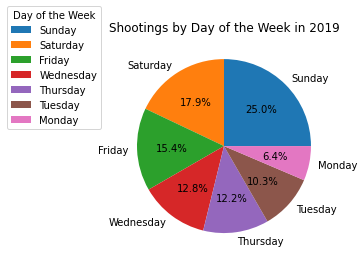

In [15]:
shootings_2019['shooting_date'] = pd.to_datetime(shootings_2019['shooting_date'])

shootings_2019['day_of_week'] = shootings_2019['shooting_date'].dt.day_name()
shootings_2019['time_of_day'] = shootings_2019['shooting_date'].dt.strftime('%H:%M')

day_counts = shootings_2019['day_of_week'].value_counts()

piechart = plt.pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%')
plt.title('Shootings by Day of the Week in 2019')
plt.legend(title="Day of the Week", loc="center left", bbox_to_anchor=(-.52, 0, 0.5, 1.72))
plt.savefig('DaysoftheWeek/Race piechart for 2019')

<ipython-input-16-3b2502b3ad26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2020['shooting_date'] = pd.to_datetime(shootings_2020['shooting_date'])
<ipython-input-16-3b2502b3ad26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2020['day_of_week'] = shootings_2020['shooting_date'].dt.day_name()
<ipython-input-16-3b2502b3ad26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

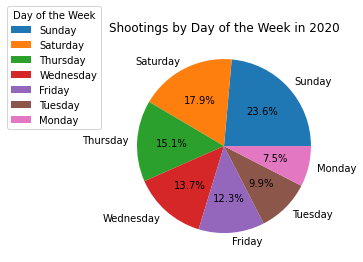

In [16]:
shootings_2020['shooting_date'] = pd.to_datetime(shootings_2020['shooting_date'])

shootings_2020['day_of_week'] = shootings_2020['shooting_date'].dt.day_name()
shootings_2020['time_of_day'] = shootings_2020['shooting_date'].dt.strftime('%H:%M')

day_counts = shootings_2020['day_of_week'].value_counts()

piechart = plt.pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%')
plt.title('Shootings by Day of the Week in 2020')
plt.legend(title="Day of the Week", loc="center left", bbox_to_anchor=(-.52, 0, 0.5, 1.72))
plt.savefig('DaysoftheWeek/Race piechart for 2020')

<ipython-input-17-1577fff2def0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2021['shooting_date'] = pd.to_datetime(shootings_2021['shooting_date'])
<ipython-input-17-1577fff2def0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2021['day_of_week'] = shootings_2021['shooting_date'].dt.day_name()
<ipython-input-17-1577fff2def0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

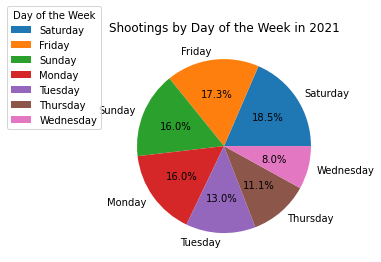

In [17]:
shootings_2021['shooting_date'] = pd.to_datetime(shootings_2021['shooting_date'])

shootings_2021['day_of_week'] = shootings_2021['shooting_date'].dt.day_name()
shootings_2021['time_of_day'] = shootings_2021['shooting_date'].dt.strftime('%H:%M')

day_counts = shootings_2021['day_of_week'].value_counts()

piechart = plt.pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%')
plt.title('Shootings by Day of the Week in 2021')
plt.legend(title="Day of the Week", loc="center left", bbox_to_anchor=(-.52, 0, 0.5, 1.72))
plt.savefig('DaysoftheWeek/Race piechart for 2021')

<ipython-input-18-fa5f20c9662e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2022['shooting_date'] = pd.to_datetime(shootings_2022['shooting_date'])
<ipython-input-18-fa5f20c9662e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2022['day_of_week'] = shootings_2022['shooting_date'].dt.day_name()
<ipython-input-18-fa5f20c9662e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

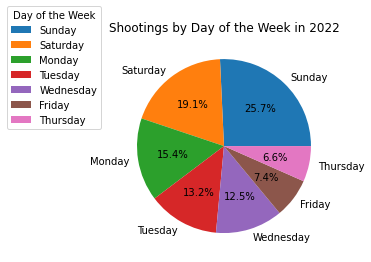

In [18]:
shootings_2022['shooting_date'] = pd.to_datetime(shootings_2022['shooting_date'])

shootings_2022['day_of_week'] = shootings_2022['shooting_date'].dt.day_name()
shootings_2022['time_of_day'] = shootings_2022['shooting_date'].dt.strftime('%H:%M')

day_counts = shootings_2022['day_of_week'].value_counts()

piechart = plt.pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%')
plt.title('Shootings by Day of the Week in 2022')
plt.legend(title="Day of the Week", loc="center left", bbox_to_anchor=(-.52, 0, 0.5, 1.72))
plt.savefig('DaysoftheWeek/Race piechart for 2022')

<ipython-input-19-e0adf6ad1c31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2023['shooting_date'] = pd.to_datetime(shootings_2023['shooting_date'])
<ipython-input-19-e0adf6ad1c31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_2023['day_of_week'] = shootings_2023['shooting_date'].dt.day_name()
<ipython-input-19-e0adf6ad1c31>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

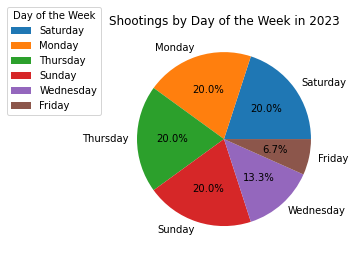

In [19]:
shootings_2023['shooting_date'] = pd.to_datetime(shootings_2023['shooting_date'])

shootings_2023['day_of_week'] = shootings_2023['shooting_date'].dt.day_name()
shootings_2023['time_of_day'] = shootings_2023['shooting_date'].dt.strftime('%H:%M')

day_counts = shootings_2023['day_of_week'].value_counts()

piechart = plt.pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%')
plt.title('Shootings by Day of the Week in 2023')
plt.legend(title="Day of the Week", loc="center left", bbox_to_anchor=(-.52, 0, 0.5, 1.72))
plt.savefig('DaysoftheWeek/Race piechart for 2023')

In [20]:
shootings_2023.head()

,incident_num,shooting_date,district,shooting_type_v2,victim_gender,victim_race,victim_ethnicity_NIBRS,multi_victim,day_of_week,time_of_day
1776,232000070,2023-01-01 05:55:00+00:00,B3,Fatal,Male,Black or African American,Not Hispanic or Latinx,t,Sunday,05:55
1777,232000070,2023-01-01 05:55:00+00:00,B3,Non-Fatal,Male,Black or African American,Not Hispanic or Latinx,t,Sunday,05:55
1779,232002635,2023-01-11 01:38:00+00:00,B2,Non-Fatal,Male,Black or African American,Hispanic or Latinx,t,Wednesday,01:38
1780,232002635,2023-01-11 01:38:00+00:00,B2,Non-Fatal,Male,White,Hispanic or Latinx,t,Wednesday,01:38
1782,232003698,2023-01-14 19:36:00+00:00,B3,Non-Fatal,NaN,NaN,NaN,f,Saturday,19:36


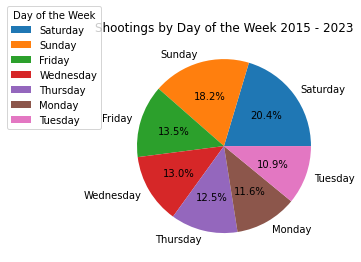

In [21]:
sd4_df['shooting_date'] = pd.to_datetime(sd4_df['shooting_date'])

sd4_df['day_of_week'] = sd4_df['shooting_date'].dt.day_name()
sd4_df['time_of_day'] = sd4_df['shooting_date'].dt.strftime('%H:%M')

day_counts = sd4_df['day_of_week'].value_counts()

piechart = plt.pie(day_counts.values, labels=day_counts.index, autopct='%1.1f%%')
plt.title('Shootings by Day of the Week 2015 - 2023')
plt.legend(title="Day of the Week", loc="center left", bbox_to_anchor=(-.52, 0, 0.5, 1.72))
plt.savefig('DaysoftheWeek/Race piechart 2015 - 2023')

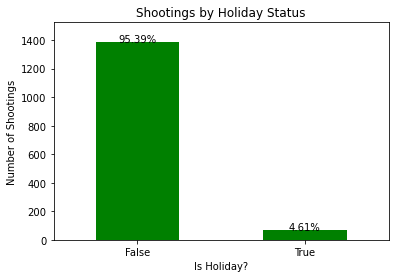

In [24]:
import holidays

us_holidays = holidays.US(years=[2015,2016,2017,2018,2019,2020,2021,2022,2023])

sd4_df['shooting_date'] = pd.to_datetime(sd4_df['shooting_date'])

sd4_df['is_holiday'] = sd4_df['shooting_date'].apply(lambda x: x in us_holidays)

holiday_counts = sd4_df.groupby('is_holiday').count()['incident_num']

# Calculate holiday percentages
holiday_pct = holiday_counts[True] / holiday_counts.sum() * 100
non_holiday_pct = 100 - holiday_pct

# Plot bar chart with percentages
ax = holiday_counts.plot(kind='bar', rot=0, color='green')
for i, v in enumerate(holiday_counts):
    ax.text(i, v+1, str(round(v/holiday_counts.sum()*100, 2)) + '%', ha='center')
plt.ylim(top=holiday_counts.max()*1.1)

plt.title('Shootings by Holiday Status')
plt.xlabel('Is Holiday?')
plt.ylabel('Number of Shootings')

plt.show()

In [2]:
import holidays

import datetime

us_holidays = holidays.US(years=[2015,2016,2017,2018,2019,2020,2021,2022,2023])

start_date = datetime.date(2015, 1, 1)
end_date = datetime.date(2023, 12, 31)
total_days = (end_date - start_date).days + 1

num_holidays = 0
for date in (start_date + datetime.timedelta(n) for n in range(total_days)):
    if date in us_holidays:
        num_holidays += 1

holiday_percentage = num_holidays / total_days * 100

print("Percentage of holidays: {:.2f}%".format(holiday_percentage))

Percentage of holidays: 3.26%


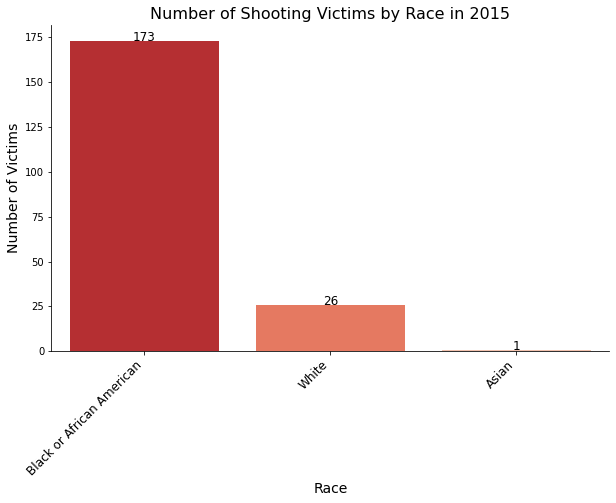

In [116]:
import seaborn as sns 

race_counts = shootings_2015["victim_race"].value_counts()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette="Reds_r", ax=ax)

ax.set_xlabel("Race", fontsize=14)
ax.set_ylabel("Number of Victims", fontsize=14)
ax.set_title("Number of Shooting Victims by Race in 2015", fontsize=16)

for i, v in enumerate(race_counts.values):
    ax.text(i, v, str(v), color="black", ha="center", fontsize=12)

plt.xticks(rotation=45, ha="right", fontsize=12)

sns.despine()

plt.savefig('Gender/Gender barchart for 2015')

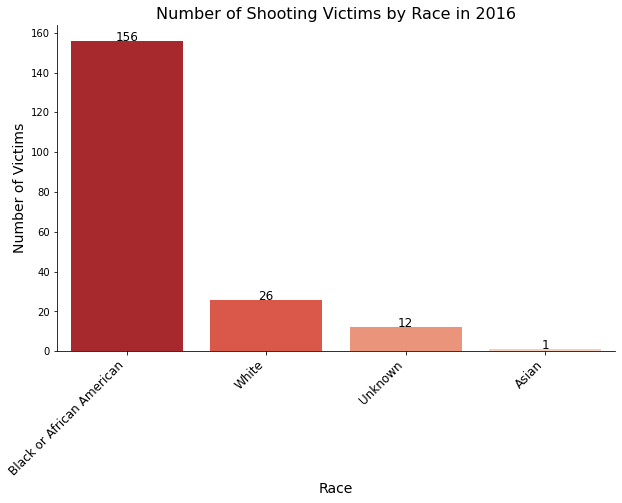

In [117]:
race_counts = shootings_2016["victim_race"].value_counts()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette="Reds_r", ax=ax)

ax.set_xlabel("Race", fontsize=14)
ax.set_ylabel("Number of Victims", fontsize=14)
ax.set_title("Number of Shooting Victims by Race in 2016", fontsize=16)

for i, v in enumerate(race_counts.values):
    ax.text(i, v, str(v), color="black", ha="center", fontsize=12)

plt.xticks(rotation=45, ha="right", fontsize=12)

sns.despine()

plt.savefig('Gender/Gender barchart for 2016')

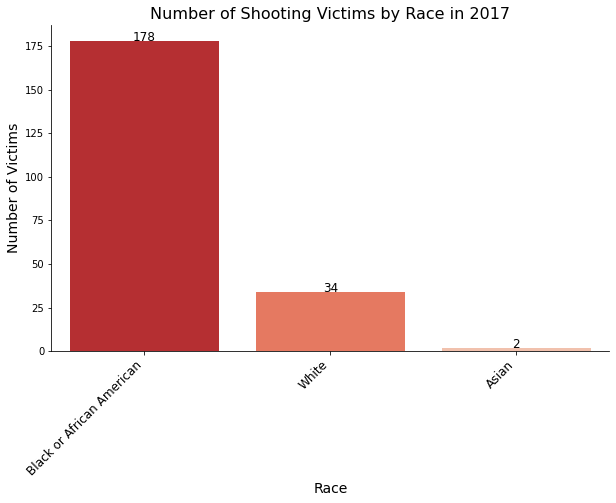

In [118]:
race_counts = shootings_2017["victim_race"].value_counts()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette="Reds_r", ax=ax)

ax.set_xlabel("Race", fontsize=14)
ax.set_ylabel("Number of Victims", fontsize=14)
ax.set_title("Number of Shooting Victims by Race in 2017", fontsize=16)

for i, v in enumerate(race_counts.values):
    ax.text(i, v, str(v), color="black", ha="center", fontsize=12)

plt.xticks(rotation=45, ha="right", fontsize=12)

sns.despine()

plt.savefig('Gender/Gender barchart for 2017')

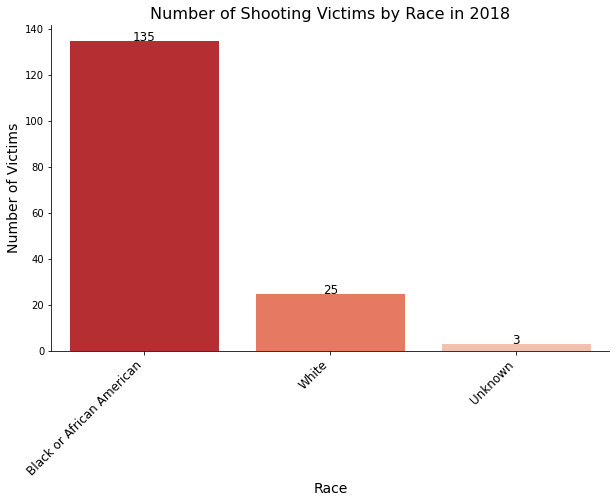

In [119]:
race_counts = shootings_2018["victim_race"].value_counts()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette="Reds_r", ax=ax)

ax.set_xlabel("Race", fontsize=14)
ax.set_ylabel("Number of Victims", fontsize=14)
ax.set_title("Number of Shooting Victims by Race in 2018", fontsize=16)

for i, v in enumerate(race_counts.values):
    ax.text(i, v, str(v), color="black", ha="center", fontsize=12)

plt.xticks(rotation=45, ha="right", fontsize=12)

sns.despine()

plt.savefig('Gender/Gender barchart for 2018')

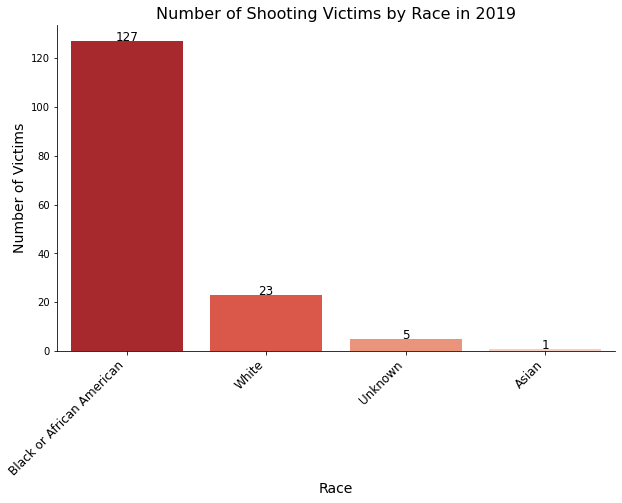

In [120]:
race_counts = shootings_2019["victim_race"].value_counts()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette="Reds_r", ax=ax)

ax.set_xlabel("Race", fontsize=14)
ax.set_ylabel("Number of Victims", fontsize=14)
ax.set_title("Number of Shooting Victims by Race in 2019", fontsize=16)

for i, v in enumerate(race_counts.values):
    ax.text(i, v, str(v), color="black", ha="center", fontsize=12)

plt.xticks(rotation=45, ha="right", fontsize=12)

sns.despine()

plt.savefig('Gender/Gender barchart for 2019')

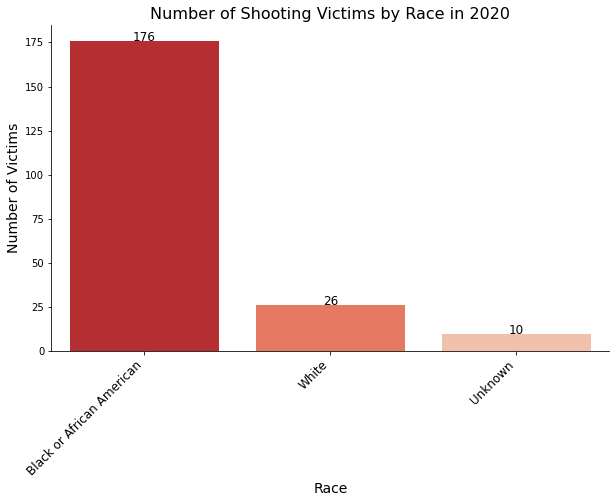

In [121]:
race_counts = shootings_2020["victim_race"].value_counts()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette="Reds_r", ax=ax)

ax.set_xlabel("Race", fontsize=14)
ax.set_ylabel("Number of Victims", fontsize=14)
ax.set_title("Number of Shooting Victims by Race in 2020", fontsize=16)

for i, v in enumerate(race_counts.values):
    ax.text(i, v, str(v), color="black", ha="center", fontsize=12)

plt.xticks(rotation=45, ha="right", fontsize=12)

sns.despine()

plt.savefig('Gender/Gender barchart for 2020')

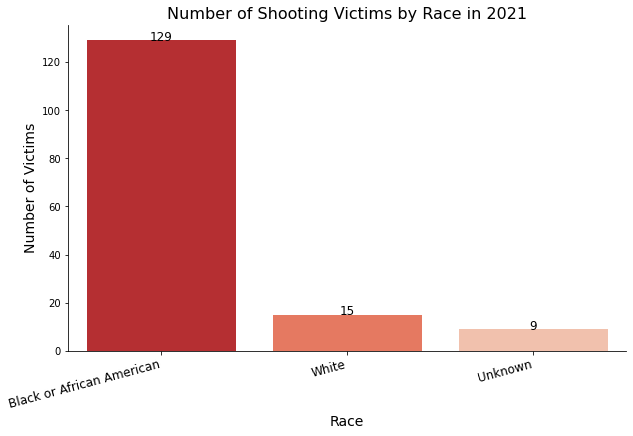

In [122]:
race_counts = shootings_2021["victim_race"].value_counts()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette="Reds_r", ax=ax)

ax.set_xlabel("Race", fontsize=14)
ax.set_ylabel("Number of Victims", fontsize=14)
ax.set_title("Number of Shooting Victims by Race in 2021", fontsize=16)

for i, v in enumerate(race_counts.values):
    ax.text(i, v, str(v), color="black", ha="center", fontsize=12)

plt.xticks(rotation=15, ha="right", fontsize=12)

sns.despine()

plt.savefig('Gender/Gender barchart for 2021')

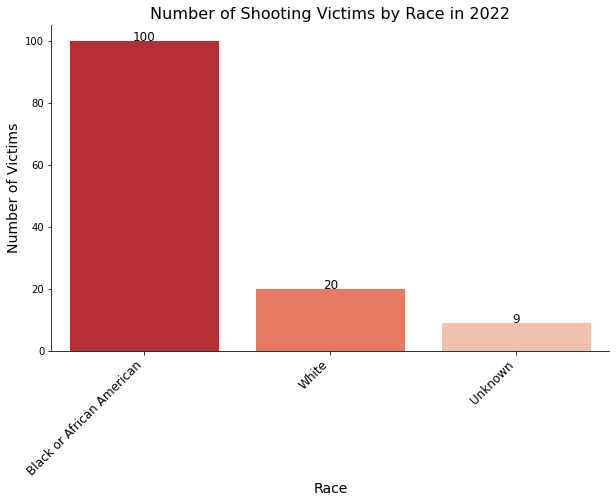

In [123]:
race_counts = shootings_2022["victim_race"].value_counts()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette="Reds_r", ax=ax)

ax.set_xlabel("Race", fontsize=14)
ax.set_ylabel("Number of Victims", fontsize=14)
ax.set_title("Number of Shooting Victims by Race in 2022", fontsize=16)

for i, v in enumerate(race_counts.values):
    ax.text(i, v, str(v), color="black", ha="center", fontsize=12)

plt.xticks(rotation=45, ha="right", fontsize=12)

sns.despine()

plt.savefig('Gender/Gender barchart for 2022')

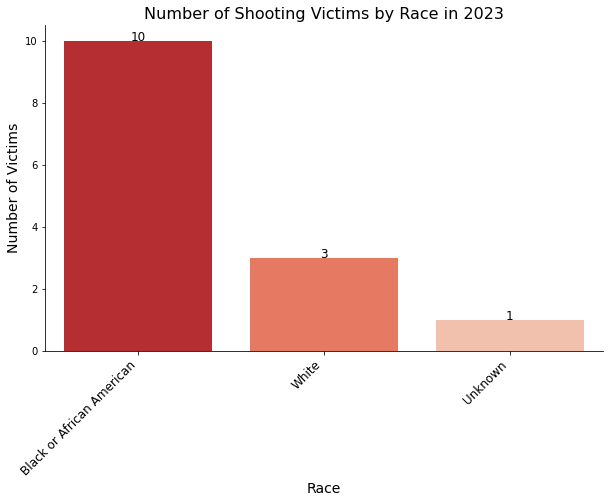

In [124]:
race_counts = shootings_2023["victim_race"].value_counts()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette="Reds_r", ax=ax)

ax.set_xlabel("Race", fontsize=14)
ax.set_ylabel("Number of Victims", fontsize=14)
ax.set_title("Number of Shooting Victims by Race in 2023", fontsize=16)

for i, v in enumerate(race_counts.values):
    ax.text(i, v, str(v), color="black", ha="center", fontsize=12)

plt.xticks(rotation=45, ha="right", fontsize=12)

sns.despine()

plt.savefig('Gender/Gender barchart for 2023')

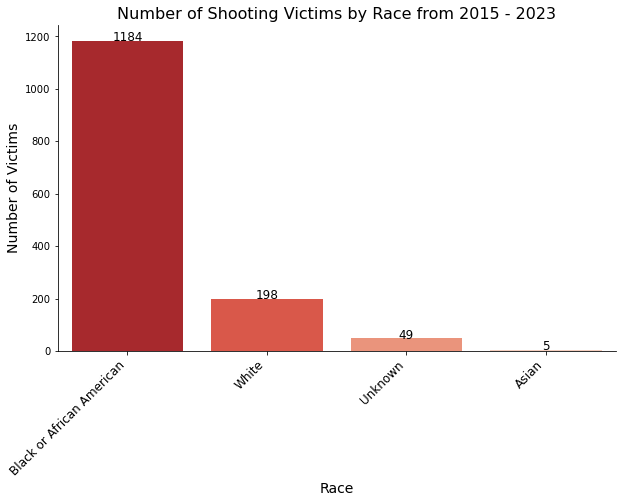

In [125]:
race_counts = sd4_df["victim_race"].value_counts()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette="Reds_r", ax=ax)

ax.set_xlabel("Race", fontsize=14)
ax.set_ylabel("Number of Victims", fontsize=14)
ax.set_title("Number of Shooting Victims by Race from 2015 - 2023", fontsize=16)

for i, v in enumerate(race_counts.values):
    ax.text(i, v, str(v), color="black", ha="center", fontsize=12)

plt.xticks(rotation=45, ha="right", fontsize=12)

sns.despine()

plt.savefig('Gender/Gender barchart for 2015 - 2023')

In [126]:
sd4_df['district'].unique()

array(['C11', 'B2', 'B3', 'E13'], dtype=object)

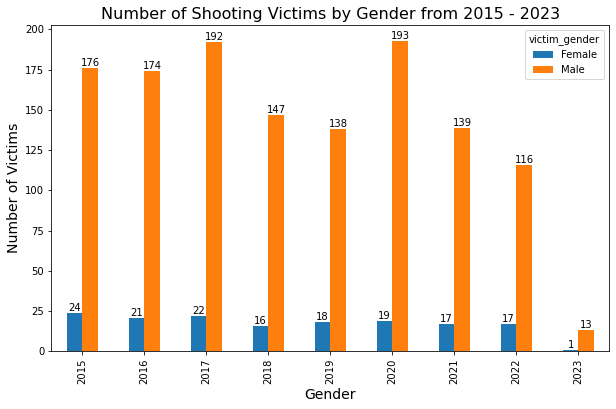

In [127]:
# sd4_df["shooting_date"] = pd.to_datetime(sd4_df["shooting_date"])

# gender_year_counts = sd4_df.groupby([sd4_df["shooting_date"].dt.year, "victim_gender"]).size()

# gender_year_counts = gender_year_counts.unstack()

# ax = gender_year_counts.plot(kind="bar", figsize=(10,6))

# plt.xlabel("Gender", fontsize=14)
# plt.ylabel("Number of Victims", fontsize=14)
# plt.title("Number of Shooting Victims by Gender from 2015 - 2023", fontsize=16)


# for i, bar in enumerate(ax.containers):
#     for j, rect in enumerate(bar):
#         height = rect.get_height()
#         label_value = int(gender_year_counts.values[j][i])
#         ax.text(rect.get_x() + rect.get_width() / 2, height, label_value, ha='center', va='bottom', fontsize=10)

# plt.show()
# plt.savefig('Number of Shooting Victims by Gender from 2015 - 2023.png')

sd4_df["shooting_date"] = pd.to_datetime(sd4_df["shooting_date"])

gender_year_counts = sd4_df.groupby([sd4_df["shooting_date"].dt.year, "victim_gender"]).size()

gender_year_counts = gender_year_counts.unstack()

ax = gender_year_counts.plot(kind="bar", figsize=(10,6))

plt.xlabel("Gender", fontsize=14)
plt.ylabel("Number of Victims", fontsize=14)
plt.title("Number of Shooting Victims by Gender from 2015 - 2023", fontsize=16)

# Add labels to each bar
for i, bar in enumerate(ax.containers):
    for j, rect in enumerate(bar):
        height = rect.get_height()
        label_value = int(gender_year_counts.values[j][i])
        ax.text(rect.get_x() + rect.get_width() / 2, height, label_value, ha='center', va='bottom', fontsize=10)

# Save the figure before showing it
plt.savefig('Number of Shooting Victims by Gender from 2015 - 2023.png')
plt.show()

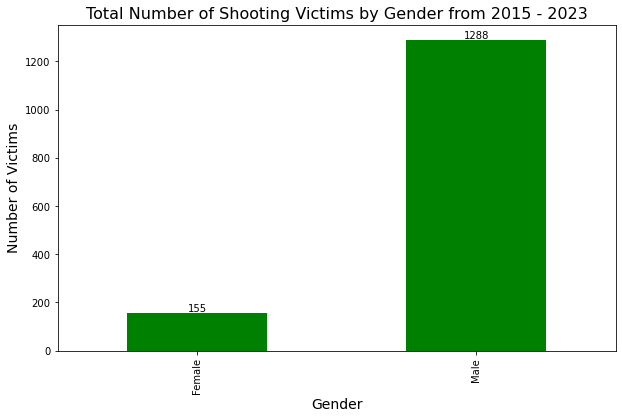

<Figure size 432x288 with 0 Axes>

In [61]:
sd4_df["shooting_date"] = pd.to_datetime(sd4_df["shooting_date"])

gender_counts = sd4_df.groupby("victim_gender").size()

ax = gender_counts.plot(kind="bar", figsize=(10,6), color='green')

for i, rect in enumerate(ax.patches):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom', fontsize=10)

plt.xlabel("Gender", fontsize=14)
plt.ylabel("Number of Victims", fontsize=14)
plt.title("Total Number of Shooting Victims by Gender from 2015 - 2023", fontsize=16)

plt.show()
plt.savefig('Total Number of Shooting Victims by Gender from 2015 - 2023')